# Example maps and SAL computation

In [9]:
import numpy as np
import SAL_calculation as sc
import SAL_visualization as sv
import field_generation as fg

# Ex 1

## Define arbitrary fields

In [10]:
# bars and fields together

# size of field
sz = 31
y = np.arange(sz)
x = np.arange(sz)
ygrid, xgrid = np.meshgrid(y, x, indexing="ij")

# settings
sigs_a = [2.5]#, 2, 3]#, 5]
ymus_a = [20]#, 10, 12]#, 50]
xmus_a = [20]#, 24, 3]#, 50]
ampls_a = [500]#, 300, 600]#, 600]

sigs_b = [2.5]
ymus_b = [15]
xmus_b = [15]
ampls_b = [500]

# bring values on field
field_a = np.zeros(ygrid.shape)
for i in range(len(ampls_a)):
    field_a += ampls_a[i] * fg.gauss2D(
        ygrid, xgrid, ymus_a[i], xmus_a[i], sigs_a[i]
    )

field_b = np.zeros(ygrid.shape)
for i in range(len(ampls_b)):
    field_b += ampls_b[i] * fg.gauss2D(
        ygrid, xgrid, ymus_b[i], xmus_b[i], sigs_b[i]
    )

## Calculate SAL metrics 

In [11]:
sal_out = sc.SAL_timestep(
    field_a,
    field_b,
)

sal_out

<xarray.Dataset>
Dimensions:    (nfields_ref: 1, nfields_sim: 1)
Dimensions without coordinates: nfields_ref, nfields_sim
Data variables:
    time       <U3 'xxx'
    S          float64 0.0
    A          float64 -2.361e-05
    L          float64 0.1667
    L1         float64 0.1667
    thld_sim   float64 0.236
    thld_ref   float64 0.236
    nF_sim     (nfields_sim) int64 1
    nF_ref     (nfields_ref) int64 1
    tcm_y_sim  (nfields_sim) float64 20.0
    tcm_x_sim  (nfields_sim) float64 20.0
    tcm_y_ref  (nfields_ref) float64 15.0
    tcm_x_ref  (nfields_ref) float64 15.0

## Visualization

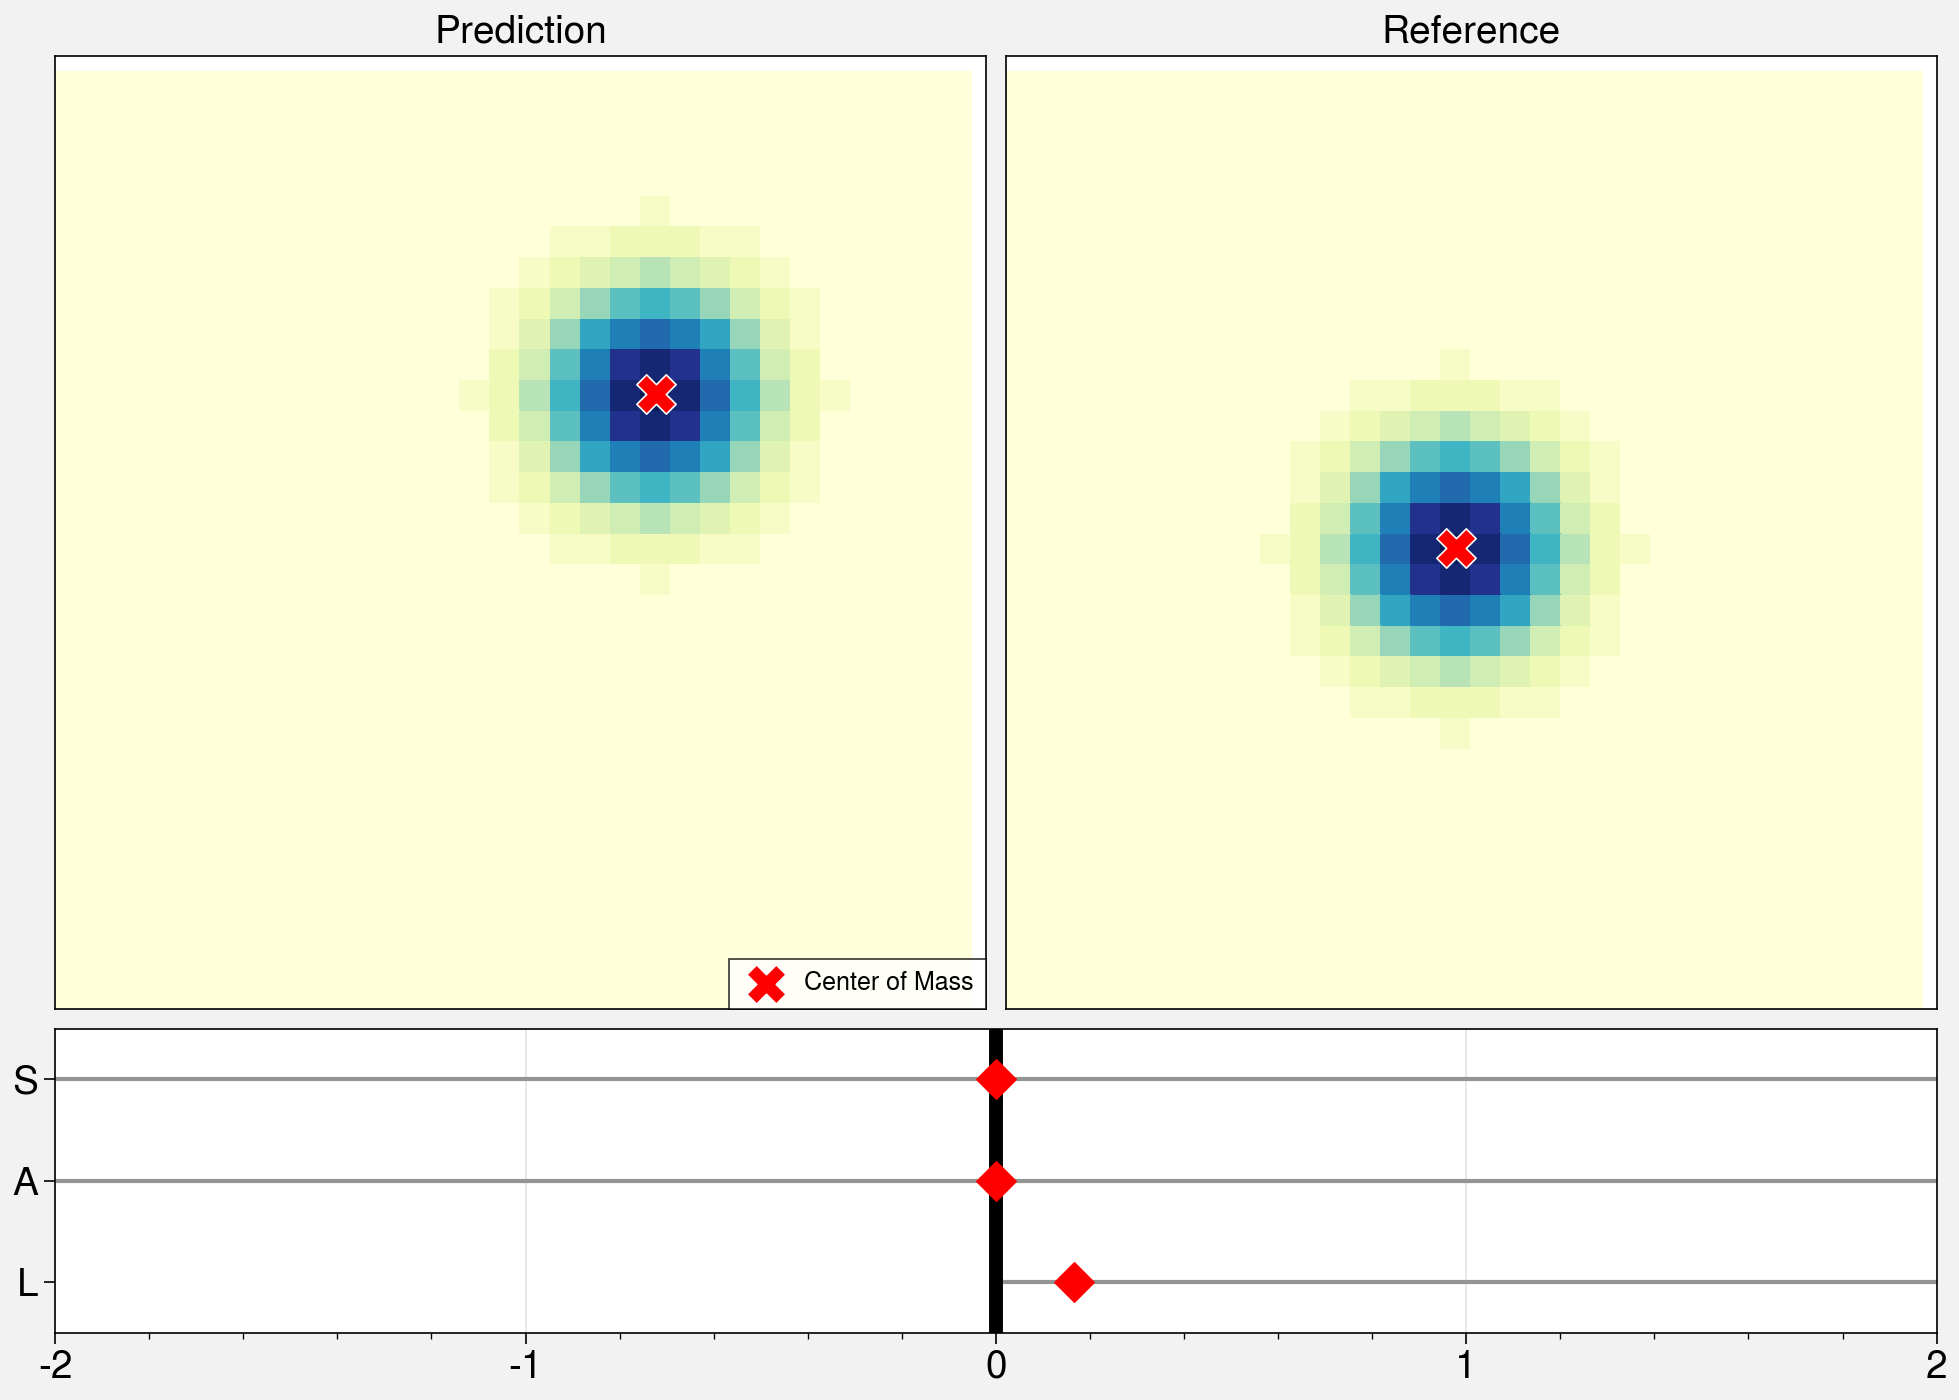

In [12]:
fields = np.concatenate(
    (np.array(field_a)[np.newaxis, :], np.array(field_b)[np.newaxis, :])
)

sv.maps_with_bars(fields, sal_out, cMap="YlGnBu")

# Ex 2

## Define arbitrary fields

In [13]:
# size of field
sz = 61
y = np.arange(sz)
x = np.arange(sz)
ygrid, xgrid = np.meshgrid(y, x, indexing="ij")

field_ref = fg.field_generator(ygrid, xgrid, 4, 30, 30, 1000)
field_perfect = fg.field_generator(ygrid, xgrid, 4, 30, 30, 1000)
field_lowS = fg.field_generator(ygrid, xgrid, 2, 30, 30, 1000)
field_highS = fg.field_generator(ygrid, xgrid, 8, 30, 30, 1000)
field_lowA = fg.field_generator(ygrid, xgrid, 4, 30, 30, 333)
field_highA = fg.field_generator(ygrid, xgrid, 4, 30, 30, 3000)
field_highL_a = fg.field_generator(ygrid, xgrid, 4, 45, 45, 1000)
field_highL_b = fg.field_generator(ygrid, xgrid,
                                   [4,4,4,4],
                                   [15,15,45,45],
                                   [15,45,15,45],
                                   [1000,1000,1000,1000])

recfields = [
    field_perfect,
    field_lowS,
    field_highS,
    field_lowA,
    field_highA,
    field_highL_a,
    # field_highL_b
]

# concatenate fields
recfields_newaxis = []
for field in recfields:
    recfields_newaxis.append(field[np.newaxis, :])
fields_rec = np.concatenate(recfields_newaxis)

titles = ["Ref / Rec 0", "Rec 1", "Rec 2", "Rec 3", "Rec 4", "Rec 5"]

## Calculate SAL metrics 

In [14]:
# sal calculation for several reconstruction fields
sal_list = []
for field in recfields:
    sal_list.append(sc.SAL_timestep(field, field_ref))

## calculate standard metrics

In [15]:
def calc_pcc(rec, ref):
    return np.corrcoef(rec.flatten(), ref.flatten())[0,1]
def calc_rmse(rec, ref):
    return (((rec - ref)**2).mean())**0.5
def calc_bias(rec, ref):
    return (rec - ref).mean() / ref.mean()

# standard metrics calculation
pcc_list = []
rmse_list = []
bias_list = []
for field in recfields:
    pcc_list.append(calc_pcc(field, field_ref))
    bias_list.append(calc_bias(field, field_ref))
    rmse_list.append(calc_rmse(field, field_ref))

## Visualization

In [16]:
# custom colormap
cLevels = np.arange(15.01).astype(float)
cLevels_label = cLevels.copy()
cLevels[0] = 1e-3

cMap = sv.colormap(
    cLevels=cLevels,
    extend=2,
    belowColor="#ffffff",
    aboveColor="#000000"
)

### one-by-one comparison

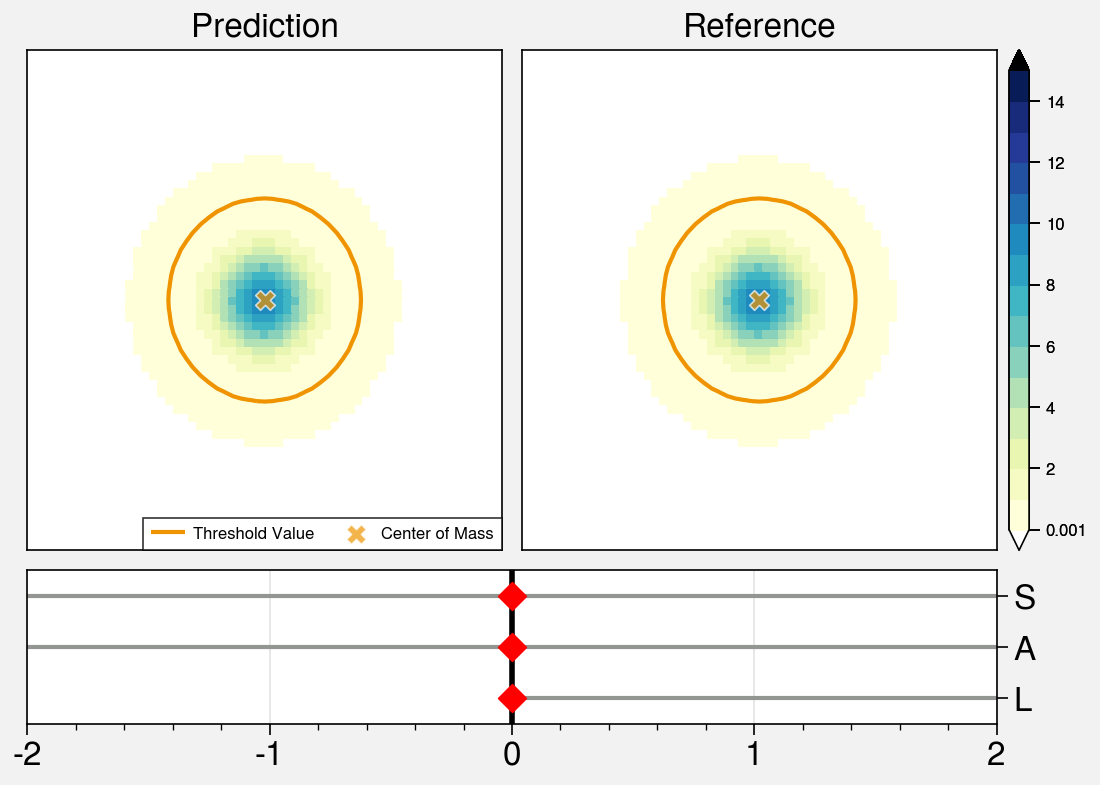

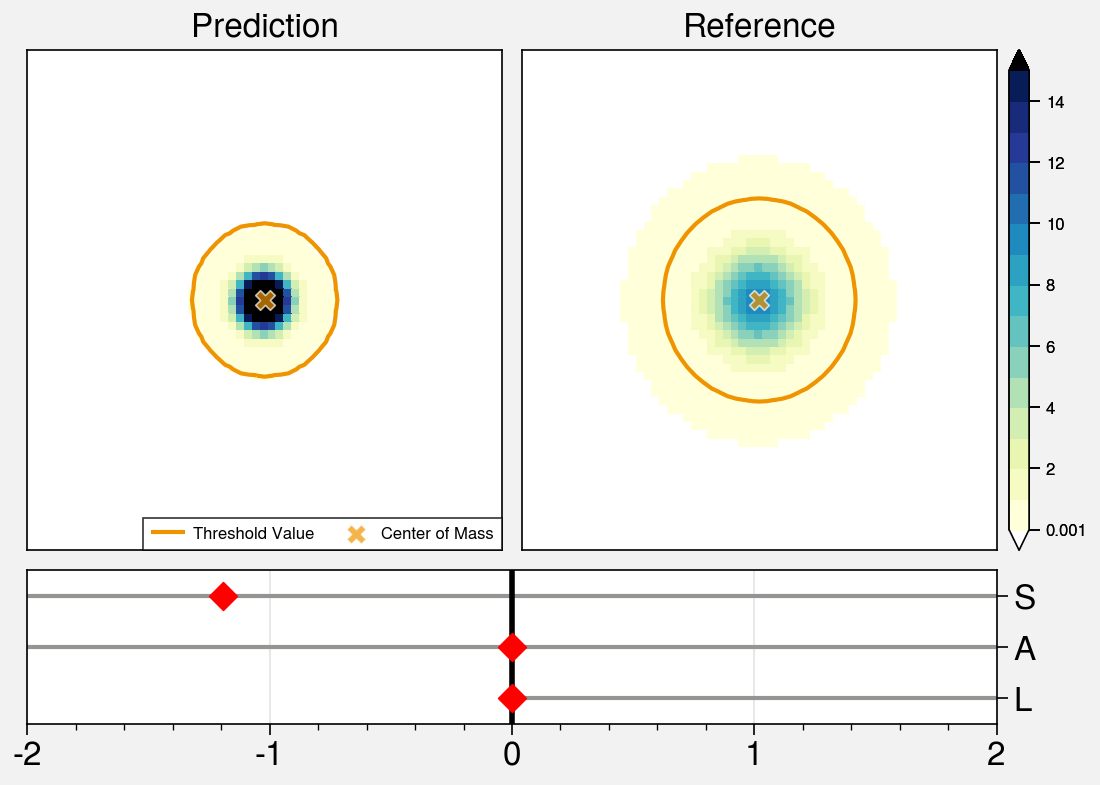

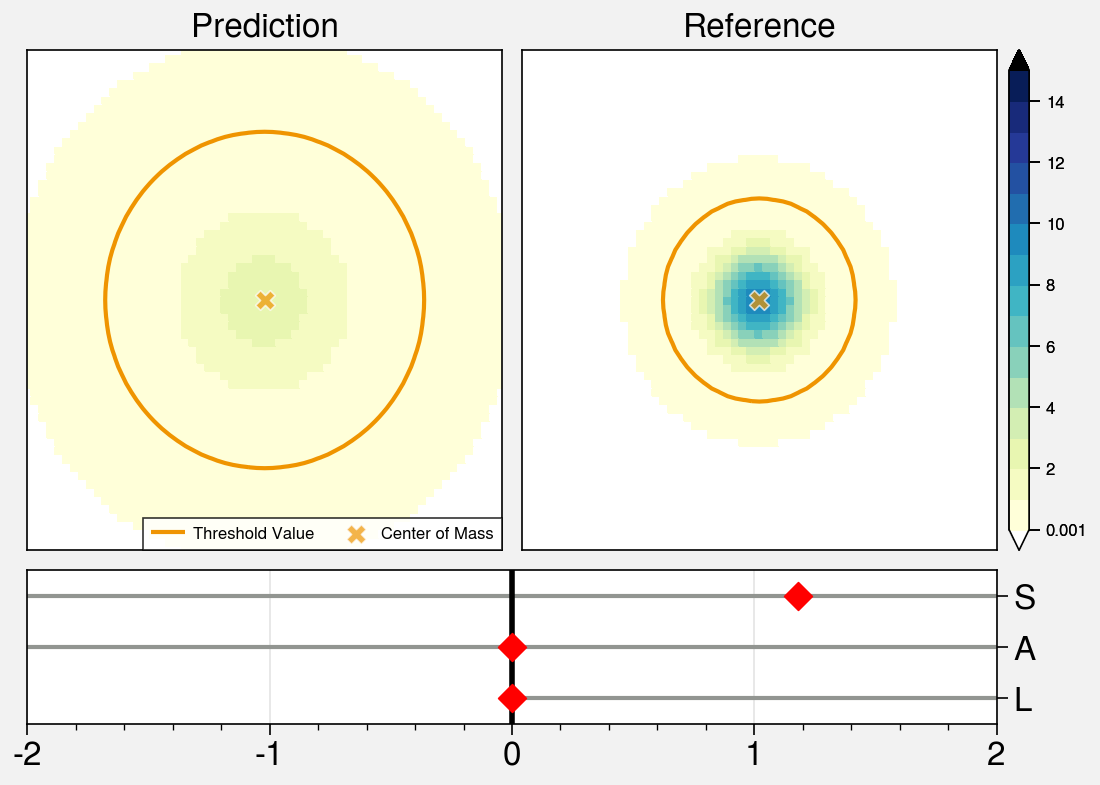

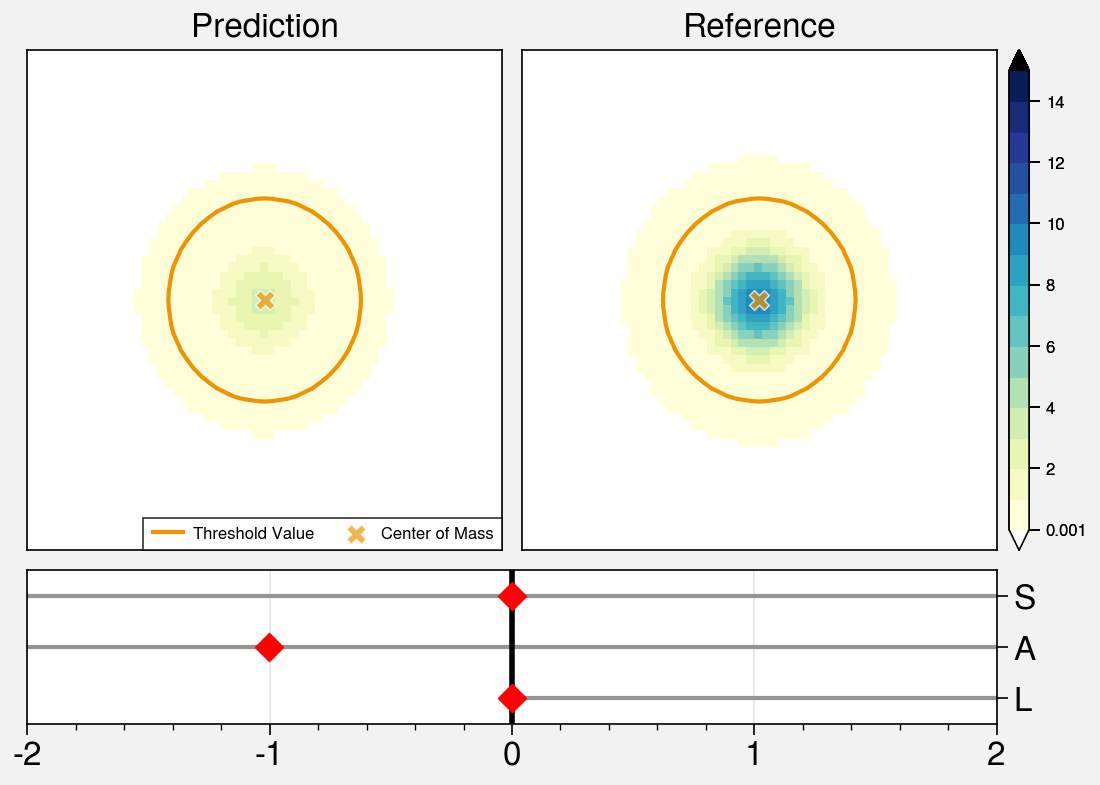

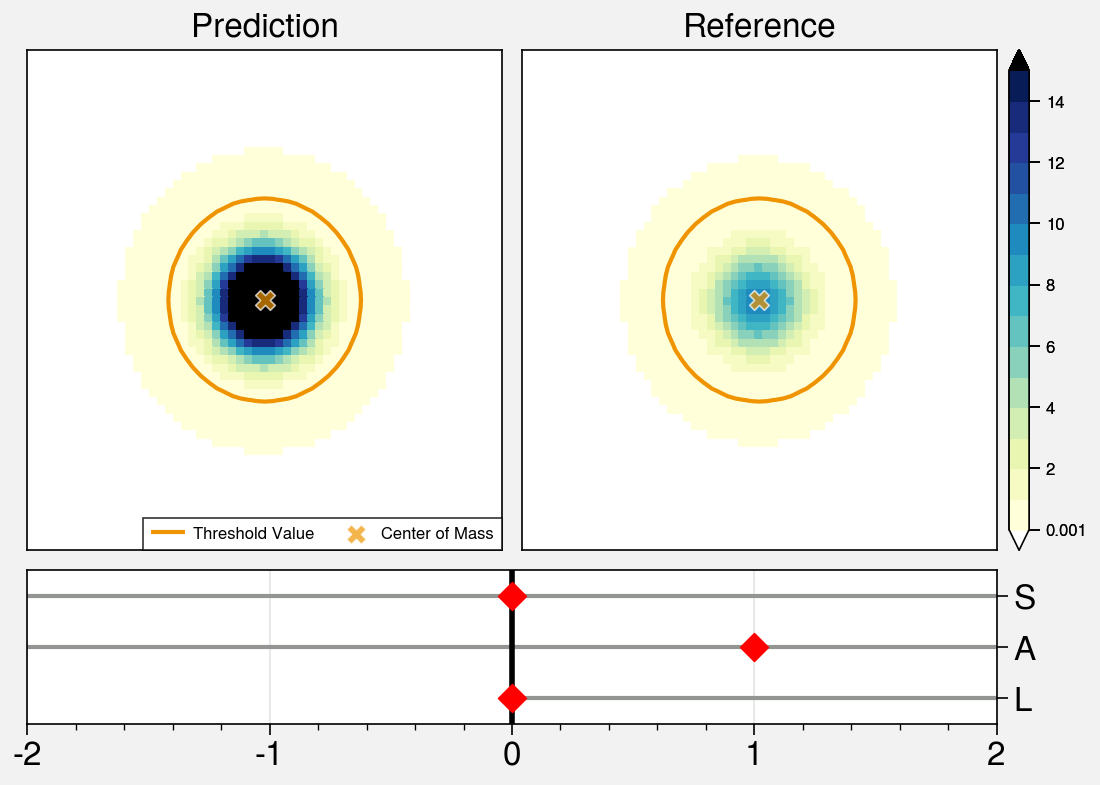

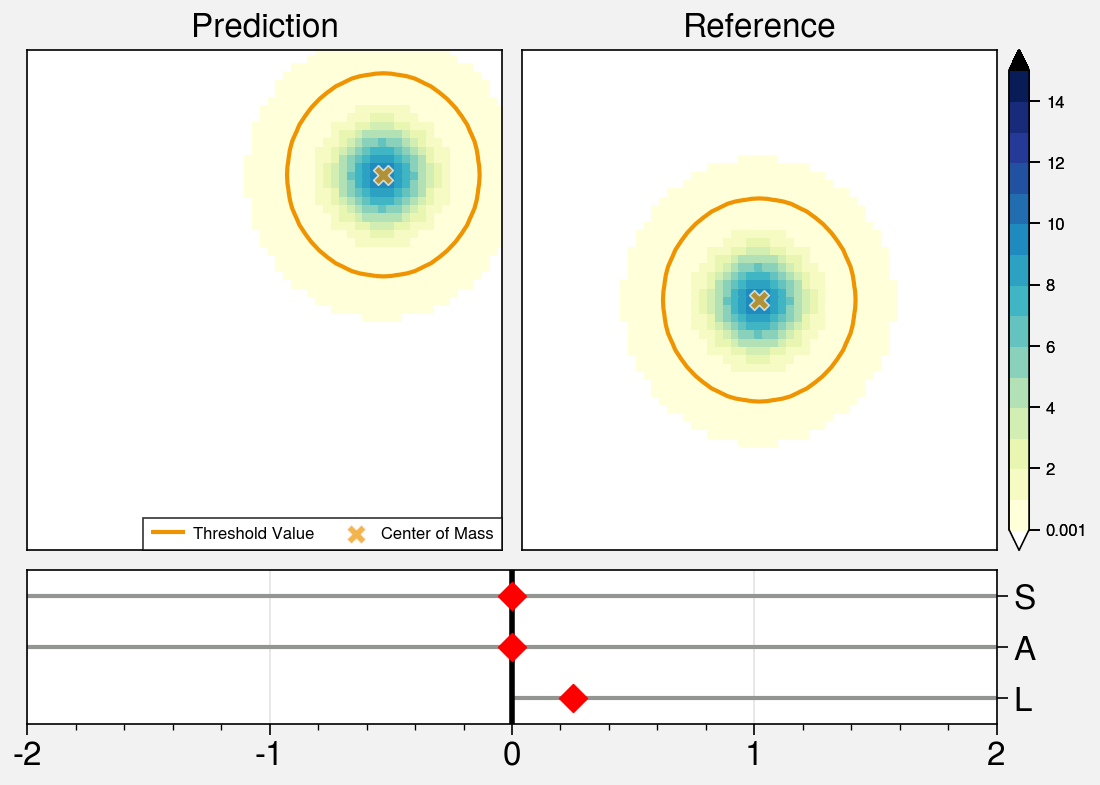

In [17]:
for field_rec in recfields:
    sal_out = sc.SAL_timestep(
        field_rec,
        field_ref,
    )
    sv.visualization_SAL(field_rec, field_ref, sal_out, cMap=cMap, cLevels=cLevels)